In [1]:
!mkdir srag_data
!wget -nc -P srag_data/ https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/dados_semanais_faixa_etaria_sexo_virus.csv

mkdir: cannot create directory ‘srag_data’: File exists
--2020-05-26 16:19:09--  https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/dados_semanais_faixa_etaria_sexo_virus.csv
Resolving gitlab.procc.fiocruz.br (gitlab.procc.fiocruz.br)... 157.86.153.131
Connecting to gitlab.procc.fiocruz.br (gitlab.procc.fiocruz.br)|157.86.153.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145530983 (139M) [text/plain]
Saving to: ‘srag_data/dados_semanais_faixa_etaria_sexo_virus.csv’

dados_semanais_faix 100%[===================>] 138,79M  2,96MB/s    in 62s     

2020-05-26 16:20:14 (2,24 MB/s) - ‘srag_data/dados_semanais_faixa_etaria_sexo_virus.csv’ saved [145530983/145530983]



In [2]:
import pandas as pd

In [3]:
obitos = (
    pd.read_csv('srag_data/dados_semanais_faixa_etaria_sexo_virus.csv', sep=';', decimal=',')
    .query('`Tipo` == "Estado"')
    .query('dado == "obito"')
    .query('sexo == "Total"')
    .query('escala == "casos"')
    .query('`Semana epidemiológica` < 21')
    .set_index(['Ano epidemiológico', 'Unidade da Federação', 'Semana epidemiológica'])
)

In [4]:
obitos.head()

data de publicação  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                      
2009               Rondônia             1                             2020-05-25   
                                        2                             2020-05-25   
                                        3                             2020-05-25   
                                        4                             2020-05-25   
                                        5                             2020-05-25   

                                                               UF    Tipo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica               
2009               Rondônia             1                      11  Estado   
                                        2                      11  Estado   
                                        3                      11  Estado   
                                        4                      11  Estado   
                                        5                      11  Estado   

                                                                dado escala  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                 
2009               Rondônia             1                      obito  casos   
                                        2                      obito  casos   
                                        3                      obito  casos   
                                        4                      obito  casos   
                                        5                      obito  casos   

                                                                sexo  \
Ano epidemiológico Unidade da Federação Semana epidemiológica          
2009               Rondônia             1                      Total   
                                        2                      Total   
                                        3                      Total   
                                        4                      Total   
                                        5                      Total   

                                                              Ano e semana epidemiológica  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                               
2009               Rondônia             1                                         2009W01   
                                        2                                         2009W02   
                                        3                                         2009W03   
                                        4                                         2009W04   
                                        5                                         2009W05   

                                                                                           Situação do dado  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                                 
2009               Rondônia             1                      Dado estável. Sujeito a pequenas alterações.   
                                        2                      Dado estável. Sujeito a pequenas alterações.   
                                        3                      Dado estável. Sujeito a pequenas alterações.   
                                        4                      Dado estável. Sujeito a pequenas alterações.   
                                        5                      Dado estável. Sujeito a pequenas alterações.   

                                                               Total reportado até a última atualização  \
Ano epidemiológico Unidade da Federação Semana epidemiológica                                             
2009               Rondônia             1                                                           0.0   
                                        2                                                           0.0   
                

In [5]:
obitos_per_week = (
    obitos
    [['Total reportado até a última atualização']]
    .swaplevel(0, 2)
    .unstack()
    .droplevel(0, axis=1)
    [[2016, 2017, 2018, 2019, 2020]]
)

In [6]:
obitos_per_week

Ano epidemiológico                          2016  2017  2018  2019   2020
Semana epidemiológica Unidade da Federação                               
1                     Acre                   0.0   0.0   2.0   3.0    0.0
                      Alagoas                0.0   0.0   0.0   1.0    0.0
                      Amapá                  0.0   0.0   0.0   0.0    0.0
                      Amazonas               0.0   0.0   1.0   0.0    3.0
                      Bahia                  0.0   1.0   1.0   0.0    0.0
...                                          ...   ...   ...   ...    ...
20                    Roraima                0.0   0.0   0.0   0.0    7.0
                      Santa Catarina         7.0   3.0   4.0   9.0    9.0
                      Sergipe                0.0   0.0   0.0   0.0    0.0
                      São Paulo             41.0  16.0  51.0  38.0  206.0
                      Tocantins              2.0   1.0   0.0   1.0    3.0

[540 rows x 5 columns]

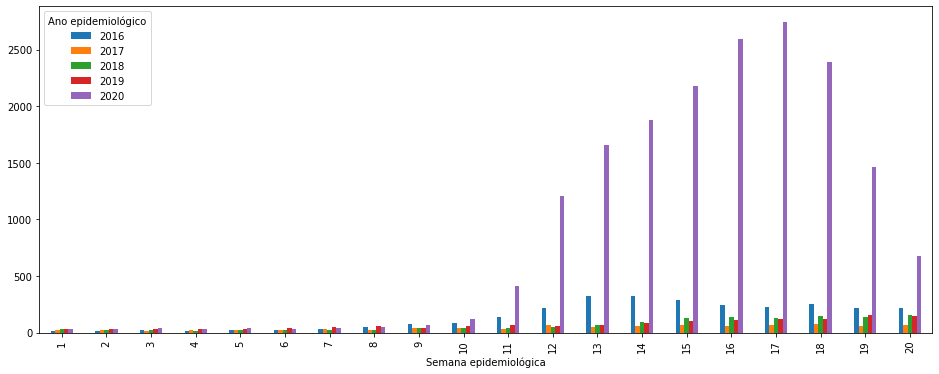

In [7]:
(
    obitos_per_week
    .groupby('Semana epidemiológica')
    .sum()
    .plot(kind='bar', figsize=(16,6))
)

In [8]:
(
    obitos
    [['Total reportado até a última atualização']]
    .unstack()
    .loc[2016:2020]
    .droplevel(0, axis=1)
)

Semana epidemiológica                     1    2    3    4    5    6     7   \
Ano epidemiológico Unidade da Federação                                       
2016               Acre                  0.0  2.0  1.0  1.0  2.0  0.0   0.0   
                   Alagoas               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Amapá                 0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Amazonas              0.0  0.0  0.0  0.0  0.0  0.0   1.0   
                   Bahia                 0.0  0.0  2.0  0.0  1.0  0.0   3.0   
...                                      ...  ...  ...  ...  ...  ...   ...   
2020               Roraima               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   Santa Catarina        1.0  0.0  1.0  1.0  0.0  0.0   1.0   
                   Sergipe               0.0  0.0  0.0  0.0  0.0  0.0   0.0   
                   São Paulo             8.0  7.0  7.0  8.0  5.0  8.0  16.0   
                   Tocantins             0.0  0.0  2.0  0.0  1.0  3.0   0.0   

Semana epidemiológica                      8     9     10     11     12  \
Ano epidemiológico Unidade da Federação                                   
2016               Acre                   0.0   0.0   1.0    0.0    1.0   
                   Alagoas                0.0   1.0   0.0    1.0    4.0   
                   Amapá                  0.0   1.0   1.0    0.0    0.0   
                   Amazonas               0.0   0.0   0.0    0.0    0.0   
                   Bahia                  5.0   1.0   3.0    5.0    1.0   
...                                       ...   ...   ...    ...    ...   
2020               Roraima                0.0   0.0   0.0    0.0    2.0   
                   Santa Catarina         3.0   0.0   1.0    8.0   22.0   
                   Sergipe                1.0   0.0   2.0    2.0    5.0   
                   São Paulo             10.0  18.0  62.0  245.0  667.0   
                   Tocantins              0.0   1.0   0.0    3.0    2.0   

Semana epidemiológica                       13     14     15     16     17  \
Ano epidemiológico Unidade da Federação                                      
2016               Acre                    0.0    0.0    2.0    2.0    3.0   
                   Alagoas                 3.0    2.0    3.0    2.0    1.0   
                   Amapá                   1.0    1.0    1.0    0.0    0.0   
                   Amazonas                0.0    1.0    1.0    0.0    1.0   
                   Bahia                   3.0    6.0    1.0    8.0    6.0   
...                                        ...    ...    ...    ...    ...   
2020               Roraima                 1.0    0.0    1.0    0.0    4.0   
                   Santa Catarina         31.0   20.0   16.0   13.0   16.0   
                   Sergipe                 2.0    2.0    3.0    4.0    4.0   
                   São Paulo             875.0  778.0  695.0  724.0  698.0   
                   Tocantins               0.0    0.0    1.0    0.0    9.0   

Semana epidemiológica                       18     19     20  
Ano epidemiológico Unidade da Federação                       
2016               Acre                    6.0    0.0    3.0  
                   Alagoas                 4.0    3.0    2.0  
                   Amapá                   1.0    0.0    0.0  
                   Amazonas                1.0    2.0    0.0  
                   Bahia                   4.0    4.0    3.0  
...                                        ...    ...    ...  
2020               Roraima                10.0   10.0    7.0  
                   Santa Catarina         10.0    8.0    9.0  
                   Sergipe                 5.0    6.0    0.0  
                   São Paulo             673.0  425.0  206.0  
                   Tocantins               9.0    3.0    3.0  

[135 rows x 20 columns]

In [9]:
(
    obitos_per_week
)

Ano epidemiológico                          2016  2017  2018  2019   2020
Semana epidemiológica Unidade da Federação                               
1                     Acre                   0.0   0.0   2.0   3.0    0.0
                      Alagoas                0.0   0.0   0.0   1.0    0.0
                      Amapá                  0.0   0.0   0.0   0.0    0.0
                      Amazonas               0.0   0.0   1.0   0.0    3.0
                      Bahia                  0.0   1.0   1.0   0.0    0.0
...                                          ...   ...   ...   ...    ...
20                    Roraima                0.0   0.0   0.0   0.0    7.0
                      Santa Catarina         7.0   3.0   4.0   9.0    9.0
                      Sergipe                0.0   0.0   0.0   0.0    0.0
                      São Paulo             41.0  16.0  51.0  38.0  206.0
                      Tocantins              2.0   1.0   0.0   1.0    3.0

[540 rows x 5 columns]

In [10]:
(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
)

Ano epidemiológico                          2016  2017  2018  2019
Semana epidemiológica Unidade da Federação                        
1                     Acre                   0.0   0.0   2.0   3.0
                      Alagoas                0.0   0.0   0.0   1.0
                      Amapá                  0.0   0.0   0.0   0.0
                      Amazonas               0.0   0.0   1.0   0.0
                      Bahia                  0.0   1.0   1.0   0.0
...                                          ...   ...   ...   ...
20                    Roraima                0.0   0.0   0.0   0.0
                      Santa Catarina         7.0   3.0   4.0   9.0
                      Sergipe                0.0   0.0   0.0   0.0
                      São Paulo             41.0  16.0  51.0  38.0
                      Tocantins              2.0   1.0   0.0   1.0

[540 rows x 4 columns]

In [11]:
obitos_ema = (
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .groupby('Unidade da Federação')
    .apply(lambda df: df.ewm(halflife = 1, axis=1).mean())
    .swaplevel()
)

In [12]:
obitos_ema

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.000000,1.142857,2.133333
Alagoas,1,0.0,0.000000,0.000000,0.533333
Amapá,1,0.0,0.000000,0.000000,0.000000
Amazonas,1,0.0,0.000000,0.571429,0.266667
Bahia,1,0.0,0.666667,0.857143,0.400000
...,...,...,...,...,...
Roraima,20,0.0,0.000000,0.000000,0.000000
Santa Catarina,20,7.0,4.333333,4.142857,6.733333
Sergipe,20,0.0,0.000000,0.000000,0.000000


In [13]:
# obitos without ewm for comparison

(
    obitos_per_week
    [[2016, 2017, 2018, 2019]]
    .swaplevel()
)

,Ano epidemiológico,2016,2017,2018,2019
Unidade da Federação,Semana epidemiológica,,,,
Acre,1,0.0,0.0,2.0,3.0
Alagoas,1,0.0,0.0,0.0,1.0
Amapá,1,0.0,0.0,0.0,0.0
Amazonas,1,0.0,0.0,1.0,0.0
Bahia,1,0.0,1.0,1.0,0.0
...,...,...,...,...,...
Roraima,20,0.0,0.0,0.0,0.0
Santa Catarina,20,7.0,3.0,4.0,9.0
Sergipe,20,0.0,0.0,0.0,0.0


In [14]:
baseline = obitos_ema[2019].unstack()

In [15]:
baseline

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Acre,2.133333,1.466667,1.000000,1.800000,1.733333,1.333333,0.933333,1.200000,1.066667,1.666667,3.200000,1.800000,2.000000,1.866667,2.666667,2.133333,2.600000,2.400000,1.466667,1.000000
Alagoas,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,1.066667,0.066667,0.000000,0.066667,0.533333,0.733333,0.666667,2.333333,1.733333,0.066667,1.066667,2.066667,1.733333
Amapá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.533333,0.000000,0.600000,0.200000,0.000000,0.533333,0.600000,1.666667,0.333333,0.000000,0.000000,0.066667,0.266667,0.000000
Amazonas,0.266667,0.533333,0.000000,1.066667,1.600000,1.866667,8.066667,10.666667,9.066667,5.866667,6.533333,3.200000,2.133333,3.533333,2.733333,1.466667,2.066667,0.066667,1.466667,2.000000
Bahia,0.400000,0.800000,0.666667,0.400000,0.733333,2.400000,1.666667,0.600000,0.600000,1.800000,2.466667,2.333333,2.333333,2.533333,3.400000,3.866667,2.933333,7.200000,7.200000,5.133333
Ceará,0.000000,0.666667,1.200000,1.333333,0.133333,1.733333,0.133333,0.533333,2.066667,1.200000,1.866667,1.200000,1.466667,3.066667,6.000000,7.533333,6.266667,6.733333,4.333333,4.000000
Distrito Federal,0.133333,0.533333,0.533333,1.133333,1.066667,0.066667,0.266667,1.466667,1.200000,1.866667,0.400000,1.333333,3.333333,2.533333,2.000000,3.400000,1.466667,1.200000,2.400000,0.133333
Espírito Santo,0.000000,0.000000,0.000000,0.000000,0.266667,0.133333,0.133333,0.466667,0.266667,0.933333,1.266667,0.400000,1.866667,1.733333,0.666667,2.266667,2.933333,4.066667,2.333333,2.733333
Goiás,3.933333,0.133333,2.466667,0.266667,2.200000,0.733333,3.266667,4.133333,4.266667,3.600000,7.933333,6.733333,8.400000,7.533333,12.200000,7.733333,4.600000,6.733333,6.466667,5.200000


In [16]:
current = (
    obitos_per_week
    [2020]
    .swaplevel()
    .unstack()
)

In [17]:
current

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,6.0,16.0,11.0,10.0,9.0,5.0,5.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0,5.0,12.0,4.0,1.0,0.0
Amazonas,3.0,6.0,2.0,4.0,5.0,3.0,3.0,4.0,1.0,4.0,8.0,28.0,76.0,202.0,401.0,547.0,519.0,267.0,85.0,45.0
Bahia,0.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,7.0,1.0,9.0,15.0,26.0,34.0,29.0,42.0,41.0,39.0,29.0,26.0
Ceará,1.0,3.0,0.0,5.0,1.0,1.0,0.0,3.0,3.0,6.0,8.0,47.0,88.0,131.0,178.0,236.0,360.0,420.0,293.0,127.0
Distrito Federal,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,16.0,19.0,12.0,17.0,13.0,15.0,13.0,14.0,8.0
Espírito Santo,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,7.0,12.0,19.0,15.0,21.0,18.0,17.0,19.0,9.0
Goiás,0.0,4.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,2.0,11.0,19.0,22.0,22.0,14.0,12.0,17.0,16.0,15.0,8.0


In [18]:
covid_cases = (
    obitos
    ['SARS-CoV-2']
    .loc[2020]
    .unstack()
)

In [19]:
covid_cases.head()

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,10.0,8.0,5.0,3.0,2.0,1.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,10.0,2.0,1.0,0.0
Amazonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,14.0,55.0,158.0,259.0,260.0,244.0,153.0,59.0,25.0
Bahia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,9.0,12.0,11.0,18.0,26.0,29.0,17.0,9.0


In [20]:
covid_cases.cumsum(axis=1)

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Acre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,9.0,11.0,13.0,13.0,13.0
Alagoas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,8.0,18.0,26.0,31.0,34.0,36.0,37.0
Amapá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,9.0,19.0,21.0,22.0,22.0
Amazonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,20.0,75.0,233.0,492.0,752.0,996.0,1149.0,1208.0,1233.0
Bahia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,14.0,26.0,37.0,55.0,81.0,110.0,127.0,136.0
Ceará,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,35.0,89.0,171.0,301.0,473.0,733.0,985.0,1153.0,1207.0
Distrito Federal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,15.0,18.0,24.0,27.0,33.0,42.0,47.0
Espírito Santo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,11.0,24.0,36.0,52.0,69.0,84.0,98.0,105.0
Goiás,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,10.0,15.0,18.0,25.0,28.0,36.0,42.0,44.0


In [21]:
estimated_subnotification = (
    (current - baseline)
    .clip(0)
    .cumsum(axis=1)
    .div(covid_cases.cumsum(axis=1))
)

In [22]:
estimated_subnotification

Semana epidemiológica,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unidade da Federação,,,,,,,,,,,,,,,,,,,,
Acre,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.600000,0.577778,0.344444,0.325926,0.266667,0.225641,0.225641,0.225641
Alagoas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,1.200000,1.333333,1.500000,1.425926,1.343590,1.447312,1.552941,1.548148,1.594595
Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,inf,inf,1.266667,1.093333,1.162963,1.182456,1.257143,1.233333,1.233333
Amazonas,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.833333,3.188889,2.196667,1.570667,1.357368,1.452304,1.675621,1.784137,1.778880,1.761148,1.760314
Bahia,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.433333,5.906667,3.800000,3.256410,2.980180,2.698182,2.302058,1.984242,1.890289,1.918627
Ceará,inf,inf,inf,inf,inf,inf,inf,inf,11.266667,8.033333,5.550000,1.942857,1.736330,1.651852,1.509856,1.443834,1.414279,1.472014,1.507892,1.542336
Distrito Federal,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,4.400000,3.138889,3.142222,3.451852,2.988889,3.158025,2.941414,2.587302,2.479433
Espírito Santo,NaN,NaN,inf,inf,inf,inf,inf,inf,inf,inf,5.333333,1.988889,2.006061,1.638889,1.490741,1.392308,1.267633,1.195238,1.194558,1.174603
Goiás,NaN,inf,inf,inf,inf,inf,inf,inf,inf,inf,10.733333,5.750000,3.660000,3.404444,2.937037,2.285333,2.483333,2.188889,2.079365,2.048485


In [23]:
estimated_subnotification[19]

Unidade da Federação
Acre                   0.225641
Alagoas                1.548148
Amapá                  1.233333
Amazonas               1.761148
Bahia                  1.890289
Ceará                  1.507892
Distrito Federal       2.587302
Espírito Santo         1.194558
Goiás                  2.079365
Maranhão               2.523810
Mato Grosso            2.085714
Mato Grosso do Sul     5.475000
Minas Gerais           4.474691
Paraná                 3.904215
Paraíba                1.622013
Pará                   1.163889
Pernambuco             1.785931
Piauí                  2.486667
Rio Grande do Norte    1.204219
Rio Grande do Sul      4.033708
Rio de Janeiro         1.437416
Rondônia               1.377778
Roraima                1.217391
Santa Catarina         2.178205
Sergipe                1.866667
São Paulo              1.625065
Tocantins              1.580392
Name: 19, dtype: float64